In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv(r"C:\Users\Santanu Das\Desktop\Big Market sale_av\train_v9rqX0R.csv")
test = pd.read_csv(r"C:\Users\Santanu Das\Desktop\Big Market sale_av\test_AbJTz2l.csv")

In [3]:
train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [7]:
def combinedData():
    df = pd.read_csv(r"C:\Users\Santanu Das\Desktop\Big Market sale_av\train_v9rqX0R.csv")
    df1 = pd.read_csv(r"C:\Users\Santanu Das\Desktop\Big Market sale_av\test_AbJTz2l.csv")
    target = df.Item_Outlet_Sales
    df.drop('Item_Outlet_Sales', axis=1, inplace=True)
    combined = df.append(df1)
    combined.reset_index(inplace=True)
    combined.drop(['Item_Identifier', 'Outlet_Identifier', 'index'], inplace=True, axis=1)
    return combined

In [8]:
combined = combinedData()

In [9]:
combined.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,11765.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681
std,4.652502,0.051459,62.086938,8.371664
min,4.555000,0.000000,31.290000,1985.000000
25%,8.710000,0.027036,94.012000,1987.000000
50%,12.600000,0.054021,142.247000,1999.000000
75%,16.750000,0.094037,185.855600,2004.000000
max,21.350000,0.328391,266.888400,2009.000000


In [10]:
combined.isnull().sum()

Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
combined.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1


In [12]:
combined['Item_Weight'].value_counts()

17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
15.100    111
19.350    109
15.700    102
15.600    100
16.700    100
17.750     99
9.800      99
20.250     97
12.600     96
16.000     95
15.850     93
10.195     93
9.300      93
17.700     93
20.700     92
12.500     92
18.850     92
14.000     92
15.000     91
19.700     91
18.250     89
17.850     89
16.750     89
9.600      85
12.850     84
         ... 
8.750       7
8.655       7
6.480       7
7.640       7
7.565       7
5.885       7
7.275       7
6.520       7
5.405       7
8.760       7
7.070       7
6.305       7
7.865       7
5.750       7
4.555       7
7.975       7
5.510       7
7.485       7
5.675       7
5.860       7
8.670       7
6.575       7
8.350       7
6.405       7
4.920       7
5.210       7
7.960       7
4.615       6
9.035       6
7.850       6
Name: Item_Weight, Length: 415, dtype: int64

In [13]:
def fillweight():
    global combined
    combined['Item_Weight'].fillna(combined['Item_Weight'].mean(), inplace=True)

In [14]:
fillweight()

In [15]:
combined.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300000,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.920000,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.500000,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store
4,8.930000,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1
5,10.395000,Regular,0.000000,Baking Goods,51.4008,2009,Medium,Tier 3,Supermarket Type2
6,13.650000,Regular,0.012741,Snack Foods,57.6588,1987,High,Tier 3,Supermarket Type1
7,12.792854,Low Fat,0.127470,Snack Foods,107.7622,1985,Medium,Tier 3,Supermarket Type3
8,16.200000,Regular,0.016687,Frozen Foods,96.9726,2002,NaN,Tier 2,Supermarket Type1
9,19.200000,Regular,0.094450,Frozen Foods,187.8214,2007,NaN,Tier 2,Supermarket Type1


In [16]:
combined['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [17]:
combined['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [18]:
def processFatContent():
    global combined
    combined["Item_Fat_Content"] = combined['Item_Fat_Content'].map(lambda d: 1 if (d == "Regular" or d == "reg") else 0)

In [19]:
processFatContent()

In [20]:
def processItemType():
    global combined
    dummies = pd.get_dummies(combined.Item_Type)
    combined = pd.concat([combined, dummies], axis="columns")
    combined.drop(['Item_Type', 'Seafood'], axis=1, inplace=True)

In [21]:
processItemType()

In [22]:
combined['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [23]:
combined['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [24]:
def fillOutlet_Size():
    global combined
    combined['Outlet_Size'].fillna('Unknown', inplace=True)
    dummies = pd.get_dummies(combined.Outlet_Size)
    combined = pd.concat([combined, dummies], axis="columns")
    combined.drop(['Outlet_Size', 'High'], axis=1, inplace=True)

In [25]:
fillOutlet_Size()

In [26]:
combined['Outlet_Location_Type'].value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

In [27]:
def processOutlet_Location_Type():
    global combined
    dummies = pd.get_dummies(combined.Outlet_Location_Type)
    combined = pd.concat([combined, dummies], axis="columns")
    combined.drop(['Outlet_Location_Type', 'Tier 1'], axis=1, inplace=True)

In [28]:
processOutlet_Location_Type()

In [29]:
combined.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Type,Baking Goods,Breads,Breakfast,Canned,...,Meat,Others,Snack Foods,Soft Drinks,Starchy Foods,Medium,Small,Unknown,Tier 2,Tier 3
0,9.300000,0,0.016047,249.8092,1999,Supermarket Type1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.920000,1,0.019278,48.2692,2009,Supermarket Type2,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,17.500000,0,0.016760,141.6180,1999,Supermarket Type1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,19.200000,1,0.000000,182.0950,1998,Grocery Store,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,8.930000,0,0.000000,53.8614,1987,Supermarket Type1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,10.395000,1,0.000000,51.4008,2009,Supermarket Type2,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,13.650000,1,0.012741,57.6588,1987,Supermarket Type1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7,12.792854,0,0.127470,107.7622,1985,Supermarket Type3,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
8,16.200000,1,0.016687,96.9726,2002,Supermarket Type1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
9,19.200000,1,0.094450,187.8214,2007,Supermarket Type1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [30]:
combined['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [31]:
def processOutlet_type():
    global combined
    dummies = pd.get_dummies(combined.Outlet_Type)
    combined = pd.concat([combined, dummies], axis="columns")
    combined.drop(['Outlet_Type'], axis=1, inplace=True)

In [32]:
processOutlet_type()

In [33]:
combined.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Starchy Foods,Medium,Small,Unknown,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.300000,0,0.016047,249.8092,1999,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,5.920000,1,0.019278,48.2692,2009,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500000,0,0.016760,141.6180,1999,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,19.200000,1,0.000000,182.0950,1998,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,8.930000,0,0.000000,53.8614,1987,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
5,10.395000,1,0.000000,51.4008,2009,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
6,13.650000,1,0.012741,57.6588,1987,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
7,12.792854,0,0.127470,107.7622,1985,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
8,16.200000,1,0.016687,96.9726,2002,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
9,19.200000,1,0.094450,187.8214,2007,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0


In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
def processEstdYear():
    global combined
    combined['Outlet_Establishment_Year']= le.fit_transform(combined['Outlet_Establishment_Year'])

In [36]:
processEstdYear()

In [37]:
def featureScaling(df):
    numerator = df - df.min()
    denominator = df.max() - df.min()
    df = numerator/denominator
    return df

In [38]:
combined['Item_Visibility'] = featureScaling(combined['Item_Visibility'])
combined['Item_MRP'] = featureScaling(combined['Item_MRP'])

In [39]:
combined.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Baking Goods,Breads,Breakfast,Canned,Dairy,...,Starchy Foods,Medium,Small,Unknown,Tier 2,Tier 3,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,9.30,0,0.048866,0.927507,4,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,5.92,1,0.058705,0.072068,8,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0,0.051037,0.468288,4,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,0.640093,3,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
4,8.93,0,0.000000,0.095805,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [40]:
train.shape

(8523, 12)

In [41]:
def recover_train_test_target():
    global combined, train
    targets = train['Item_Outlet_Sales']
    train1 = combined.head(8523)
    test1 = combined.iloc[8523:]
    return train1, targets, test1 

In [42]:
X, y, test = recover_train_test_target()

In [43]:
len(y)

8523

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.02)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel

In [47]:
model = LinearRegression()

In [48]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
y_pred = model.predict(X_test)

In [50]:
model.score(X_test, y_test)

0.5065287354344525

In [51]:
from math import sqrt
from sklearn.metrics import mean_squared_error

In [52]:
rms = sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: ", rms)

RMSE:  1087.8692513868139


In [53]:
from sklearn.feature_selection import SelectFromModel

In [54]:
clf = SelectFromModel(model, prefit=True, max_features=10)
X_reduced = clf.transform(X)
X_reduced.shape

(8523, 4)

In [55]:
test_reduced = clf.transform(test)
test_reduced.shape

(5681, 4)

In [56]:
model2 = LinearRegression()
model2.fit(X_reduced, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
pred = model2.predict(test_reduced)
pred

array([1797.17472247, 1477.50167678, 1918.69676208, ..., 1966.51317118,
       3458.5271686 , 1360.41915179])

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [59]:
bestfeatures = SelectKBest(score_func = chi2,k=6)
fit = bestfeatures.fit(X,y.astype(int))

In [60]:
fit.scores_

array([4415.67280486, 2190.53002014,  420.19823723,  845.92739953,
       7016.77338512, 2965.85201747, 3680.80905728, 3382.50413518,
       3201.94418328, 3289.81660283, 3100.01990814, 2849.93674655,
       3307.90552858, 3009.26455442, 2951.26662804, 3230.6241807 ,
       2663.99135945, 2971.00663061, 3232.18807914, 3426.70655874,
       2366.49496175, 2246.30223477, 2229.73593294, 2265.60803618,
       1963.54657692, 5337.44914484, 1454.05104978, 2616.83521109,
       3923.26137235])

In [61]:
features = pd.DataFrame()
features['Feature'] = X.columns
features['Importance'] = fit.scores_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)
features.head(10)

,Importance
Feature,
Outlet_Establishment_Year,7016.773385
Grocery Store,5337.449145
Item_Weight,4415.672805
Supermarket Type3,3923.261372
Breads,3680.809057
Starchy Foods,3426.706559
Breakfast,3382.504135
Hard Drinks,3307.905529
Dairy,3289.816603


In [62]:
print(features.nlargest(10,'Importance'))

                            Importance
Feature                               
Outlet_Establishment_Year  7016.773385
Grocery Store              5337.449145
Item_Weight                4415.672805
Supermarket Type3          3923.261372
Breads                     3680.809057
Starchy Foods              3426.706559
Breakfast                  3382.504135
Hard Drinks                3307.905529
Dairy                      3289.816603
Soft Drinks                3232.188079


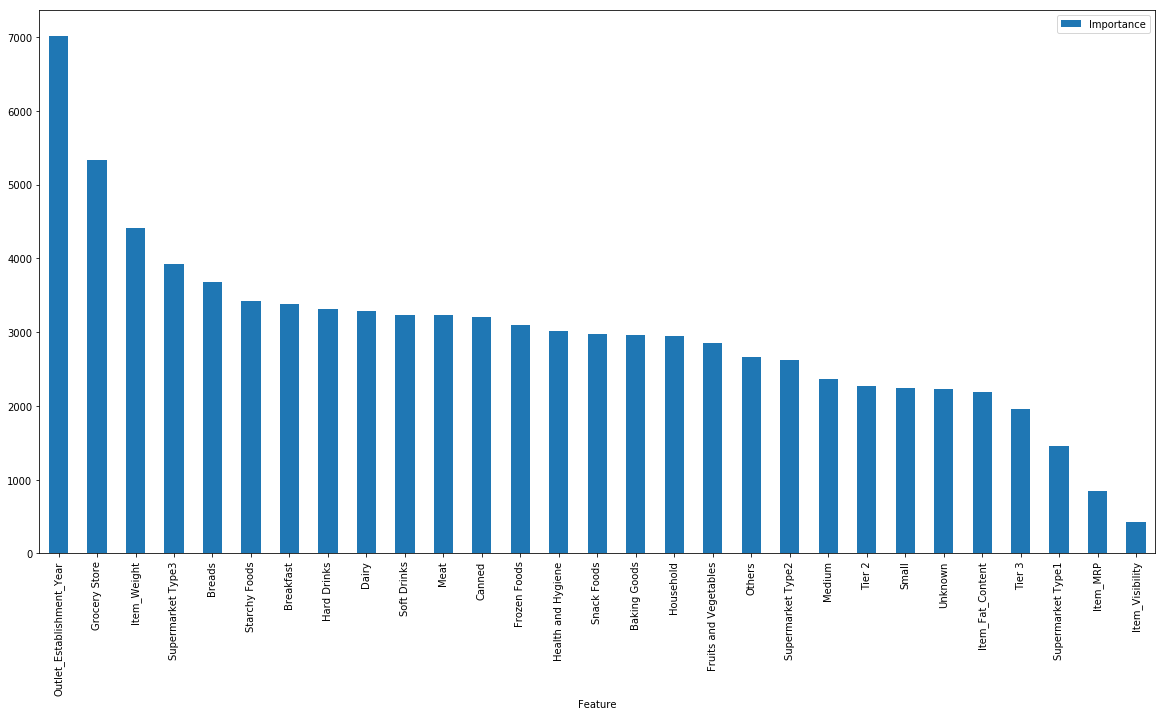

In [63]:
features.plot(kind='bar', figsize=(20, 10))

In [64]:
X_reduced2 = fit.transform(X)
X_reduced2.shape

(8523, 6)

In [65]:
test_reduced2 = fit.transform(test)
test_reduced2.shape

(5681, 6)

In [66]:
model3 = LinearRegression()
model3.fit(X_reduced2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
prediction2 = model3.predict(test_reduced2)
prediction2

array([2318.49328587, 2205.08626343,  320.75708874, ..., 2248.1463826 ,
       2239.6032236 , 2245.68088545])

In [71]:
res=[]
for i in prediction2:
    if i<0:
        res.append(abs(i))
    else:
        res.append(i)    

In [72]:
res

[2318.4932858672023,
 2205.086263428026,
 320.7570887427055,
 2200.2292340320473,
 3691.2488625512624,
 2299.1763270135357,
 2242.235036136667,
 3691.2488625512624,
 2229.926358626124,
 2193.671011598899,
 2246.0135162063225,
 2231.331692004656,
 363.8622064973915,
 2260.9314257935066,
 2350.785451896381,
 2246.426804017226,
 2296.7166765637176,
 2234.83854467071,
 3691.2488625512624,
 315.8260944320673,
 2303.2013567987233,
 2276.172815837892,
 2318.1606551094924,
 363.8622064973915,
 2276.172815837892,
 282.22136820506853,
 2245.600651111936,
 2279.575624628749,
 2318.900304256088,
 2244.614452249808,
 363.8622064973915,
 2193.664742176881,
 2208.457725108796,
 3691.2488625512624,
 2213.8216218608604,
 3691.2488625512624,
 3691.2488625512624,
 300.0222576664721,
 2254.6427562499393,
 3691.2488625512624,
 2250.8642761802835,
 346.1517094424919,
 2205.727292688409,
 2222.5110588941143,
 303.01300772741297,
 2318.4627841901483,
 306.2106555263231,
 2244.86100196534,
 2241.4093059478932,

In [73]:
df_out = pd.DataFrame()
aux = pd.read_csv(r"C:\Users\Santanu Das\Desktop\Big Market sale_av\test_AbJTz2l.csv")
df_out['Item_Identifier'] = aux ['Item_Identifier']
df_out['Outlet_Identifier'] = aux['Outlet_Identifier']
df_out['Item_Outlet_Sales'] = res
df_out[['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']].to_csv('output3.csv', index=False)